In [ ]:
!pip install h5py

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py

# path to your .h5 file on Google Drive
file_path = '/content/drive/MyDrive/Test_h5/SW_PMTEST_001.h5'
h5_file = h5py.File(file_path, 'r')

# Inspect the file structure
def print_h5_structure(name, obj):
    print(name)
    if isinstance(obj, h5py.Group):  # Check if the object is a Group
        for key in obj.keys():
            print(f" - {key}")
    else:  # If it's not a Group, it's likely a Dataset
        print(f" - (Dataset, shape: {obj.shape}, dtype: {obj.dtype})")

# Print the structure of the file
h5_file.visititems(print_h5_structure)

image_tensor
 - (Dataset, shape: (2, 25, 288, 288), dtype: float64)


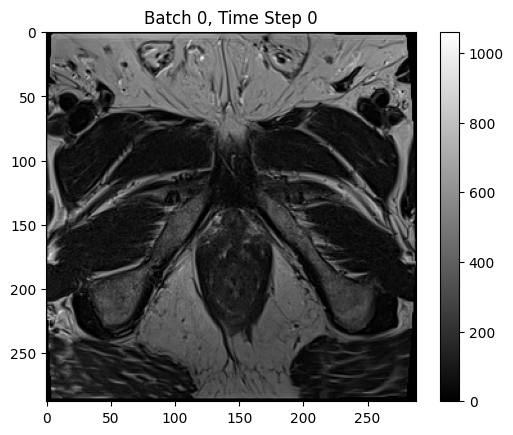

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dataset = h5_file['image_tensor']
# Select a specific slice (e.g., first batch, first time step)
batch_idx = 0  # Choose 0 or 1
time_step = 0  # Choose between 0 to 24

# Extract the 2D image from the 4D array
image_slice = dataset[batch_idx, time_step, :, :]

# Visualize the selected slice
plt.imshow(image_slice, cmap='gray')
plt.colorbar()
plt.title(f"Batch {batch_idx}, Time Step {time_step}")
plt.show()


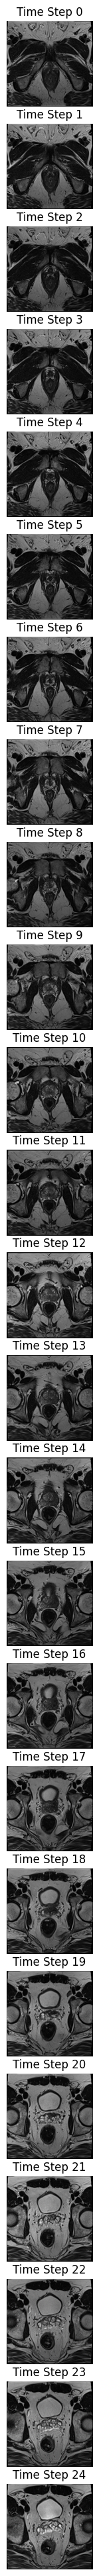

In [ ]:
# Select a batch and plot the first few time steps in a grid
batch_idx = 0  # Change to 1 if you want the second batch
num_time_steps = 25  # Number of time steps to plot

fig, axes = plt.subplots(num_time_steps,1 , figsize=(150, 50))

for i in range(num_time_steps):
    axes[i].imshow(dataset[batch_idx, i, :, :], cmap='gray')
    axes[i].set_title(f"Time Step {i}")
    axes[i].axis('off')

plt.show()


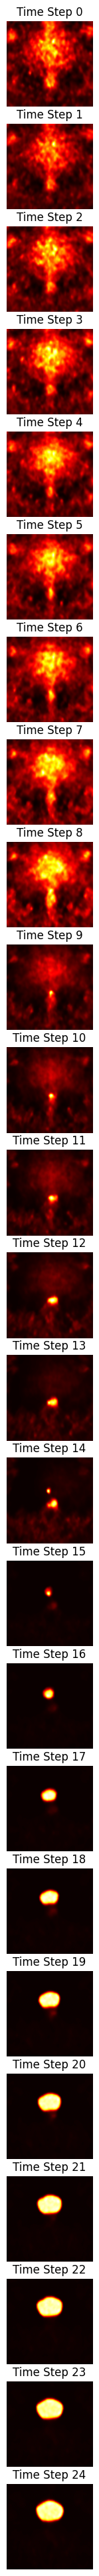

In [ ]:
# Select a batch and plot the first few time steps in a grid
batch_idx = 1  # Change to 1 if you want the second batch
num_time_steps = 25  # Number of time steps to plot

fig, axes = plt.subplots( num_time_steps,1, figsize=(150, 50))

for i in range(num_time_steps):
    axes[i].imshow(dataset[batch_idx, i, :, :], cmap= "hot")
    axes[i].set_title(f"Time Step {i}")
    axes[i].axis('off')

plt.show()


Dataset shape: (2, 25, 288, 288)


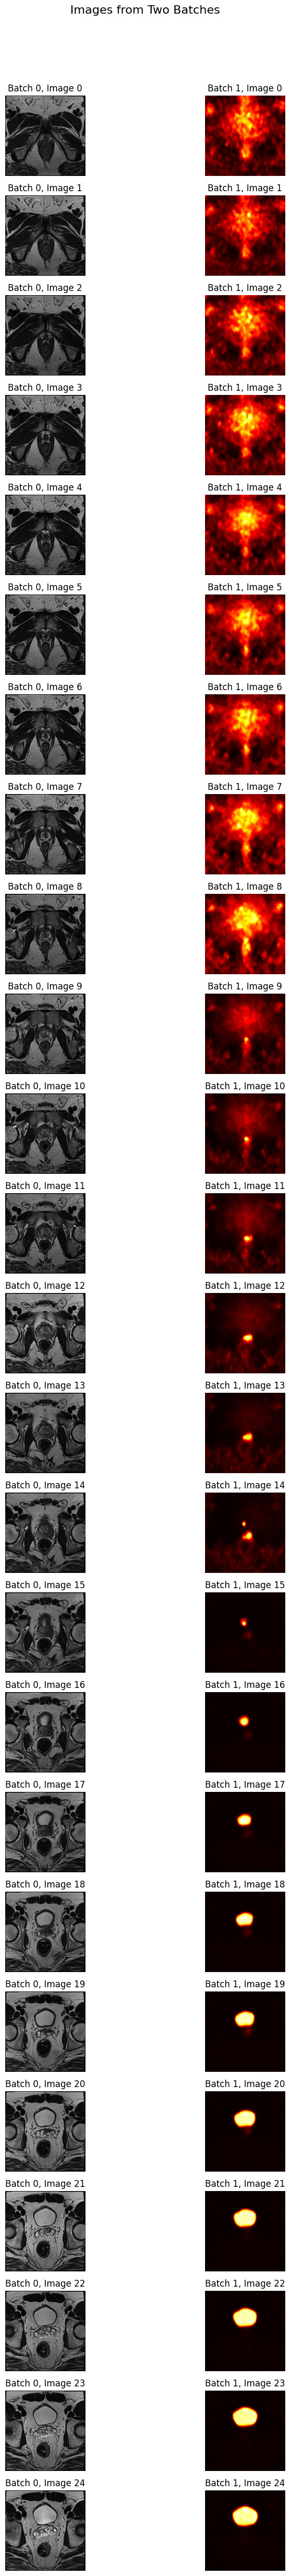

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dataset = h5_file['image_tensor']
# Assuming dataset is a 4D NumPy array of shape (2, 25, height, width)
# Batch 0 is the first batch, Batch 1 is the second batch

# Check dataset details
print(f"Dataset shape: {dataset.shape}")

# Set up the figure
fig, axes = plt.subplots(nrows=25, ncols=2, figsize=(10, 50))  # 25 rows, 2 columns
fig.suptitle("Images from Two Batches", fontsize=16)

# Iterate through the images in each batch
for i in range(25):  # 25 images per batch
    # Batch 0: Left column
    axes[i, 0].imshow(dataset[0, i, :, :], cmap='gray')
    axes[i, 0].set_title(f"Batch 0, Image {i}")
    axes[i, 0].axis('off')

    # Batch 1: Right column
    axes[i, 1].imshow(dataset[1, i, :, :], cmap='hot')
    axes[i, 1].set_title(f"Batch 1, Image {i}")
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


In [ ]:
# Check Intensity Range for All Images
import h5py

# Open the HDF5 file
file_path = '/content/drive/MyDrive/Test_h5/SW_PMTEST_001.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Access the dataset (replace 'image_tensor' with the correct key)
    dataset = h5_file['image_tensor']

    # Check dataset shape
    print(f"Dataset shape: {dataset.shape}")

    # Iterate through each batch and time step
    num_batches, num_time_steps, height, width = dataset.shape

    for batch_idx in range(num_batches):
        for time_step in range(num_time_steps):
            # Extract individual image
            image_slice = dataset[batch_idx, time_step, :, :]

            # Compute intensity range
            min_val = image_slice.min()
            max_val = image_slice.max()

            print(f"Batch {batch_idx}, Image {time_step}: Min = {min_val}, Max = {max_val}")


Dataset shape: (2, 25, 288, 288)
Batch 0, Image 0: Min = 0.0, Max = 1061.0
Batch 0, Image 1: Min = 0.0, Max = 997.0
Batch 0, Image 2: Min = 0.0, Max = 1062.0
Batch 0, Image 3: Min = 0.0, Max = 959.0
Batch 0, Image 4: Min = 0.0, Max = 951.0
Batch 0, Image 5: Min = 0.0, Max = 997.0
Batch 0, Image 6: Min = 0.0, Max = 972.0
Batch 0, Image 7: Min = 0.0, Max = 933.0
Batch 0, Image 8: Min = 0.0, Max = 1102.0
Batch 0, Image 9: Min = 0.0, Max = 998.0
Batch 0, Image 10: Min = 0.0, Max = 998.0
Batch 0, Image 11: Min = 0.0, Max = 1077.0
Batch 0, Image 12: Min = 0.0, Max = 832.0
Batch 0, Image 13: Min = 0.0, Max = 1034.0
Batch 0, Image 14: Min = 0.0, Max = 985.0
Batch 0, Image 15: Min = 0.0, Max = 1017.0
Batch 0, Image 16: Min = 0.0, Max = 996.0
Batch 0, Image 17: Min = 0.0, Max = 989.0
Batch 0, Image 18: Min = 0.0, Max = 949.0
Batch 0, Image 19: Min = 0.0, Max = 924.0
Batch 0, Image 20: Min = 0.0, Max = 877.0
Batch 0, Image 21: Min = 0.0, Max = 803.0
Batch 0, Image 22: Min = 0.0, Max = 927.0
Batch

In [ ]:
# Save Results to a File
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the HDF5 file
file_path = '/content/drive/MyDrive/Test_h5/SW_PMTEST_001.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Access the dataset
    dataset = h5_file['image_tensor']

    # Check dataset shape
    print(f"Dataset shape: {dataset.shape}")

    # Iterate through each batch and time step and save intensity ranges to a file
    num_batches, num_time_steps, height, width = dataset.shape

    with open("/content/drive/MyDrive/Test_h5/intensity_ranges.txt", "w") as file:
        for batch_idx in range(num_batches):
            for time_step in range(num_time_steps):
                image_slice = dataset[batch_idx, time_step, :, :]  # Access dataset within the 'with' block
                min_val = image_slice.min()
                max_val = image_slice.max()
                file.write(f"Batch {batch_idx}, Image {time_step}: Min = {min_val}, Max = {max_val}\n")

Dataset shape: (2, 25, 288, 288)


1. check out https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
2. format the data as aligned_dataset
2. use pix2pix model to train, refer to scripts/train_pix2pix.py

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
